In [1]:
import ml_development as ml
import time
from typing import List, Dict
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [3]:
df = ml.read_csv("filtered_df.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,5.888878,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,5.888878,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,5.888878,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,5.888878,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,8.597482,8.342125,5.590987,5.888878,1.0,Urban,Y


In [11]:
# shufle the data into validation and Training data
# Training data is further split into training and test for used during model development
# Validaton is used to assess and evaluate the best model performance.
# Split the data into training and test sets

target_feature = 'Loan_Status'
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(max_iter=1000),
    LinearDiscriminantAnalysis(),
    SVC()
]
cv = 10
test_size = 0.25 # default value is 0.2
columns_to_remove = ['Loan_ID']
random_state = 43
    
trained_df, validate_df = ml.shuffle_and_split(df, target_feature, test_size, random_state, columns_to_remove)
results_df = ml.train_models(trained_df, target_feature, models, test_size, cv)
results_df

Best model DecisionTreeClassifier saved to best_model_DecisionTreeClassifier.joblib
Best model RandomForestClassifier saved to best_model_RandomForestClassifier.joblib
Best model LogisticRegression saved to best_model_LogisticRegression.joblib


,Model,Mean CV Accuracy,CV Accuracy Std,Accuracy,Precision,Recall,F1-Score,Confusion Matrix,Best Model
0,DecisionTreeClassifier,0.629630,0.052378,0.644444,0.636279,0.644444,0.640068,"[[9, 17], [15, 49]]",False
1,RandomForestClassifier,0.792593,0.057854,0.766667,0.754113,0.766667,0.738534,"[[9, 17], [4, 60]]",False
2,LogisticRegression,0.796296,0.044598,0.788889,0.837216,0.788889,0.741758,"[[7, 19], [0, 64]]",True
3,LinearDiscriminantAnalysis,0.796296,0.044598,0.788889,0.837216,0.788889,0.741758,"[[7, 19], [0, 64]]",False
4,SVC,0.807407,0.043192,0.788889,0.837216,0.788889,0.741758,"[[7, 19], [0, 64]]",False


In [13]:
trained_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
105,0.276168,0.877207,0.730785,0.278566,0.413197,True,True,False,True,False,False,False,False,False,N
72,0.621950,1.134873,0.762527,-2.053501,0.413197,True,True,False,True,False,False,False,True,False,Y
471,1.672222,-1.095337,2.680545,0.278566,0.413197,False,True,True,False,False,False,False,True,False,Y
361,-0.551604,0.889895,0.356257,0.278566,0.413197,True,True,False,False,False,False,False,False,False,Y
260,-0.594892,-1.095337,-0.520249,0.278566,0.413197,True,False,False,False,False,False,False,True,False,Y


In [15]:
validate_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
17,0.544108,1.133546,1.782188,0.278566,0.413197,True,True,True,False,False,False,False,False,True,Y
428,0.262702,-1.095337,-0.422505,0.278566,-2.420153,False,False,False,False,False,False,False,True,False,N
388,-0.616981,-1.095337,-0.581294,0.278566,0.413197,True,True,True,False,False,False,True,True,False,Y
344,-0.239533,1.106432,0.752003,0.278566,0.413197,True,False,False,False,False,False,False,True,False,Y
311,-0.696768,-1.095337,-1.324609,-0.335435,0.413197,True,False,False,False,False,True,False,False,False,N


In [13]:
# Load the best model
loaded_model = ml.load_model("best_model_LogisticRegression.joblib")

Model loaded from best_model_LogisticRegression.joblib


In [15]:
def evaluate_model_on_validation_set(model, X_val, y_val):
    """
    Evaluates the model on a validation set and prints performance metrics.

    Args:
        model: Trained model instance.
        X_val (pd.DataFrame): Features of the validation set.
        y_val (pd.Series): True labels of the validation set.
    """
    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    cm = confusion_matrix(y_val, y_pred)

    # Print performance metrics
    print("Validation Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)


In [17]:
X_val = validate_df.drop(target_feature, axis=1)
y_val = validate_df[target_feature]
evaluate_model_on_validation_set(loaded_model, X_val, y_val)

Validation Performance:
Accuracy: 0.7986
Precision: 0.8439
Recall: 0.7986
F1-Score: 0.7619
Confusion Matrix:
[[ 15  29]
 [  0 100]]


In [7]:
ml.plot_best_model_explanation(results_df, models, trained_df, target_feature, test_size, extra_columns_to_remove)

  0%|          | 0/360 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [9]:
import pandas as pd
from typing import List
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import shap

def encode_categorical_features(df: pd.DataFrame, target_feature: str, extra_columns_to_remove: List[str] = None):
    """
    Encodes categorical features using one-hot encoding and prepares X, y for modeling.

    Args:
        df (pd.DataFrame): The dataset.
        target_feature (str): The target feature column name.
        extra_columns_to_remove (List[str], optional): Additional columns to exclude from X.

    Returns:
        Tuple[pd.DataFrame, pd.Series]: Encoded feature matrix X and target vector y.
    """
    if extra_columns_to_remove is None:
        extra_columns_to_remove = []
        
    # Drop target and extra columns
    X = df.drop(columns=[target_feature] + extra_columns_to_remove)
    y = df[target_feature]

    # One-hot encode categorical variables
    X_encoded = pd.get_dummies(X, drop_first=True)

    return X_encoded, y

def plot_best_model_explanation(results_df, models, trained_df, target_feature, test_size, extra_columns_to_remove: List[str] = None):
    """
    Generates the SHAP summary plot for the best model based on the results DataFrame.

    Args:
        results_df (pd.DataFrame): DataFrame with model results.
        models (list): List of model instances.
        trained_df (pd.DataFrame): Pre-split training dataset.
        target_feature (str): Name of the target feature column.
        test_size (float): Proportion of the dataset to include in the test split.
        extra_columns_to_remove (List[str], optional): Additional columns to exclude from the feature matrix.
    """
    best_model_idx = results_df[results_df['Best Model'] == True].index[0]
    best_model_name = results_df.loc[best_model_idx, 'Model']
    
    # Encode features and split data
    X, y = encode_categorical_features(trained_df, target_feature, extra_columns_to_remove)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Retrieve the best model
    best_model = models[best_model_idx]

    # Initialize the SHAP explainer
    if isinstance(best_model, (DecisionTreeClassifier, RandomForestClassifier)):
        background_samples = shap.sample(X_train, 10)  # Use shap.sample to summarize the background data
        explainer = shap.KernelExplainer(best_model.predict_proba, background_samples)
    elif isinstance(best_model, (LogisticRegression, LinearDiscriminantAnalysis)):
        explainer = shap.LinearExplainer(best_model, X_train)
    elif isinstance(best_model, SVC):
        explainer = shap.KernelExplainer(best_model.predict_proba, X_train)
    else:
        raise ValueError(f"Unsupported model type: {best_model_name}")

    # Calculate SHAP values for the best model
    shap_values = explainer.shap_values(X_train)

    # Plot the SHAP summary plot for the best model
    shap.summary_plot(shap_values, X_train, plot_type='bar', class_names=best_model.classes_)

# Example usage
# Define models, results_df, and trained_df before calling
# models = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), LinearDiscriminantAnalysis()]
# results_df should be the DataFrame from the training function showing results
# trained_df is your DataFrame containing the data

plot_best_model_explanation(results_df, models, trained_df, target_feature='Loan_Status', test_size=0.2, extra_columns_to_remove=['Loan_ID'])

  0%|          | 0/384 [00:00<?, ?it/s]

KeyboardInterrupt: 

#### Data Splitting

In [15]:
from sklearn.model_selection import train_test_split
#Create Training and Test Sets and Apply Scaling
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
X_train.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
442,8.111928,0.000000,4.262680,5.888878,1.0,True,False,False,False,False,False,False,False,True
434,9.224243,0.000000,5.564520,5.888878,1.0,True,True,False,False,True,False,True,True,False
397,8.188411,7.160846,4.615121,5.888878,1.0,True,False,False,False,False,True,False,False,False


In [17]:
y_train.head(3)

442    Y
434    Y
397    N
Name: Loan_Status, dtype: object

#### Scaling the variables

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_test

array([[0.42999874, 0.        , 0.63360558, ..., 0.        , 0.        ,
        0.        ],
       [0.56134089, 0.        , 0.81001167, ..., 0.        , 0.        ,
        1.        ],
       [0.41359106, 0.        , 0.4886414 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.2589283 , 0.75023407, 0.5391282 , ..., 0.        , 1.        ,
        0.        ],
       [0.37927063, 0.74735424, 0.67536925, ..., 1.        , 0.        ,
        1.        ],
       [0.31171636, 0.5882985 , 0.58319264, ..., 0.        , 0.        ,
        1.        ]])

### Building Predictive Model

#### Logistics Regression

In [22]:
log_reg = LogisticRegression().fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(log_reg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(log_reg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on test set: 0.78


In [26]:
y_pred = log_reg.predict(X_test)

In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[16, 26],
       [ 0, 78]], dtype=int64)

In [30]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           N       1.00      0.38      0.55        42
           Y       0.75      1.00      0.86        78

    accuracy                           0.78       120
   macro avg       0.88      0.69      0.70       120
weighted avg       0.84      0.78      0.75       120



#### Using Cross_Validation

The technique of cross validation (CV) is best explained by example using the most common method, K-Fold CV. When we approach a machine learning problem, 

1. we make sure to split our data into a training and a testing set. 
2. In K-Fold CV, we further split our training set into K number of subsets, called folds. 
3. We then iteratively fit the model K times (i.e fit 5 models in 5 Folds CV), each time training the data on K-1 of the folds and evaluating on the Kth fold (called the validation data). 

As an example, consider fitting a model with K = 5. The first iteration we train on the first four folds and evaluate on the fifth. The second time we train on the first, second, third, and fifth fold and evaluate on the fourth. We repeat this procedure 3 more times, each time evaluating on a different fold. 

4. At the very end of training, we average the performance on each of the folds to come up with final validation metrics for the model.

For hyperparameter tuning, we perform many iterations of the entire K-Fold CV process, each time using different model settings. We then compare all of the models, select the best one, train it on the full training set, and then evaluate on the testing set. 

Instead of following this manual process RandomSearchCV and GridSearch automate the process.

In [35]:

#seed = 7
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = model_selection.KFold(n_splits=10)
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print(("Accuracy: %.3f (%.3f)") % (results.mean(), results.std()))

Accuracy: 0.814 (0.060)


#### Hyperparameter Tuning for Logistic Regression

When creating a ML model it is often difficult to define which model architecture that will optimise the model.  A model is optimised at a point where the model can strike a balance between overfitting and underfitting. Hence, GridSearch and RandomSearch are two method of searching for the optimum point for a model optimization by exploring a range of different possibilities. 

1. The objective of the model parameter is to learn the patterns in the input features for it to be able to predict the output feature. Model parameter are learned by the model during the training process.

2. Hyperparameter's object is to reduce the loss. i.e achieving a point where the model is optimised.

#### 1. Using GridSearch 

GridSearch can be used to find the optimum parameters of the logistic regressor.

In [39]:
dual=[True,False]
max_iter=[2.5,3,3.5,4,4.5]
param_grid=dict(dual=dual,max_iter=max_iter)

In [41]:
log_reg = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=log_reg,param_grid=param_grid,cv=10,n_jobs=1)

start_time=time.time()
grid_result = grid.fit(X_train,y_train)

#summary of results
print ("Best: %f using %s" %(grid_result.best_score_,grid_result.best_params_))
print ("Execution time: " + str((time.time()- start_time)) + 'ms')

C:\Users\seune\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\seune\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Best: 0.769444 using {'dual': False, 'max_iter': 4}
Execution time: 0.7709364891052246ms


C:\Users\seune\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
 0.70555556        nan 0.76944444        nan]
  warnings.warn(
C:\Users\seune\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
#summary of results
print ("Best: %f using %s" %(grid_result.best_score_,grid_result.best_params_))
print ("Execution time: " + str((time.time()- start_time)) + 'ms')

Best: 0.769444 using {'dual': False, 'max_iter': 4}
Execution time: 30.320932388305664ms


In [45]:
dual=[True,False]
max_iter=[1,2,3,4,5]
C = [1.0,1.5,2.0,2.5]
param_grid=dict(dual=dual,max_iter=max_iter)

In [47]:
log_reg = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=log_reg,param_grid=param_grid,cv=10,n_jobs=1)

start_time=time.time()
grid_result = grid.fit(X_train,y_train)

C:\Users\seune\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\seune\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [49]:
#summary of results
print("Best: %f using %s" %(grid_result.best_score_,grid_result.best_params_))
print ("Execution time: " + str((time.time()- start_time)) + 'ms')

Best: 0.805556 using {'dual': False, 'max_iter': 5}
Execution time: 9.608636617660522ms


#### 2. Random Search

In [57]:
random = RandomizedSearchCV(estimator=log_reg, param_distributions=param_grid, cv=10, n_jobs=-1)
start_time=time.time()
random_result = random.fit(X_train,y_train)



C:\Users\seune\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\seune\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\seune\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\seune\AppData\Local\anaconda3\Lib\site-packages\sklearn\lin

In [59]:
#summary of results
print("Best: %f using %s" %(random_result.best_score_,random_result.best_params_))
print ("Execution time: " + str((time.time()- start_time)) + 'ms')

Best: 0.805556 using {'max_iter': 5, 'dual': False}
Execution time: 24.58357858657837ms


In [23]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X = df.drop("Loan_Status", axis=1) # Independent variables
X = df.drop("Loan_ID", axis=1) # Independent variables''
y = df.Loan_Status # Dependent variable

X = pd.get_dummies(data=X, drop_first=True)

# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train a machine learning model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           N       1.00      1.00      1.00        33
           Y       1.00      1.00      1.00        63

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



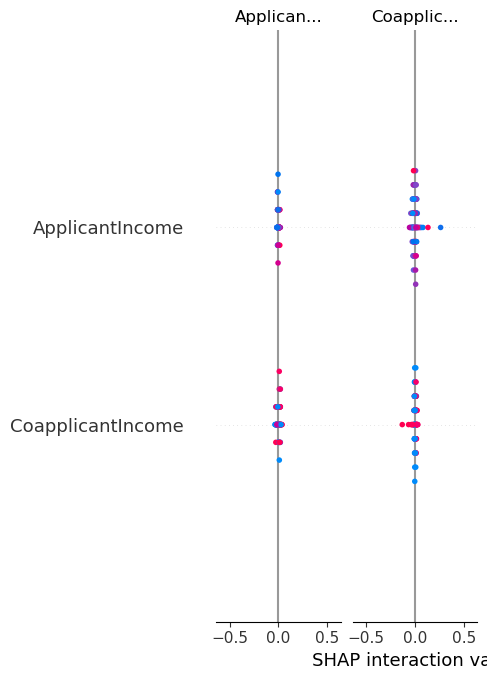

In [25]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)